In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-13,2.655795,2.700129,2.651561,2.677464,2.670905,157628624
2004-09-14,2.676219,2.789544,2.659780,2.776842,2.770039,217608605
2004-09-15,2.753679,2.845086,2.744712,2.789544,2.782710,215279909
2004-09-16,2.798012,2.884189,2.780827,2.838610,2.831656,186207345
2004-09-17,2.849818,2.926282,2.828149,2.926282,2.919113,190350817


In [6]:
google_data.shape

(5036, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,46.135488,46.622729,45.673421,46.155555,46.045289,1.147579e+08
std,44.205394,44.695104,43.769439,44.234942,44.134558,1.491704e+08
min,2.655795,2.700129,2.651561,2.677464,2.670905,1.584340e+05
25%,13.110670,13.214531,12.939874,13.101641,13.069545,2.708504e+07
50%,27.240460,27.427975,26.990647,27.186360,27.119760,5.400500e+07
75%,61.163001,61.568501,60.490251,60.986625,60.837218,1.408751e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2004-09-13 to 2024-09-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5036 non-null   float64
 1   High       5036 non-null   float64
 2   Low        5036 non-null   float64
 3   Close      5036 non-null   float64
 4   Adj Close  5036 non-null   float64
 5   Volume     5036 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


# Data Cleaning and Analysis

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing Price of Google Data')

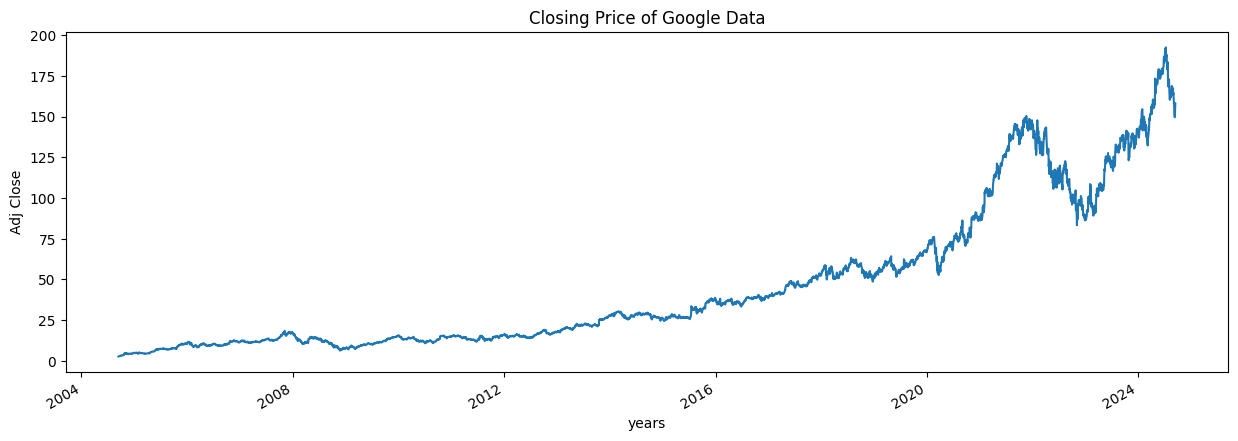

In [15]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google Data")

In [21]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} Price of Google Data")

In [22]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

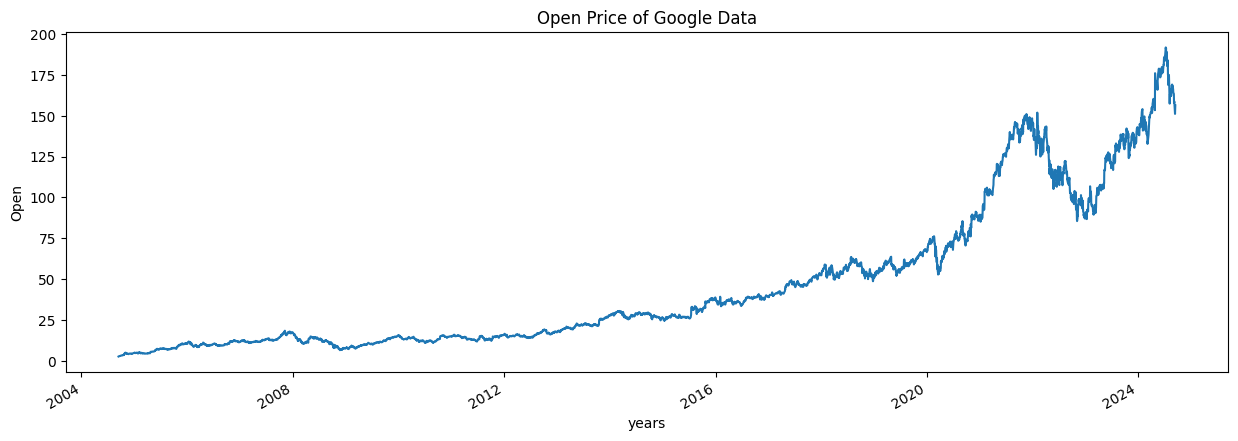

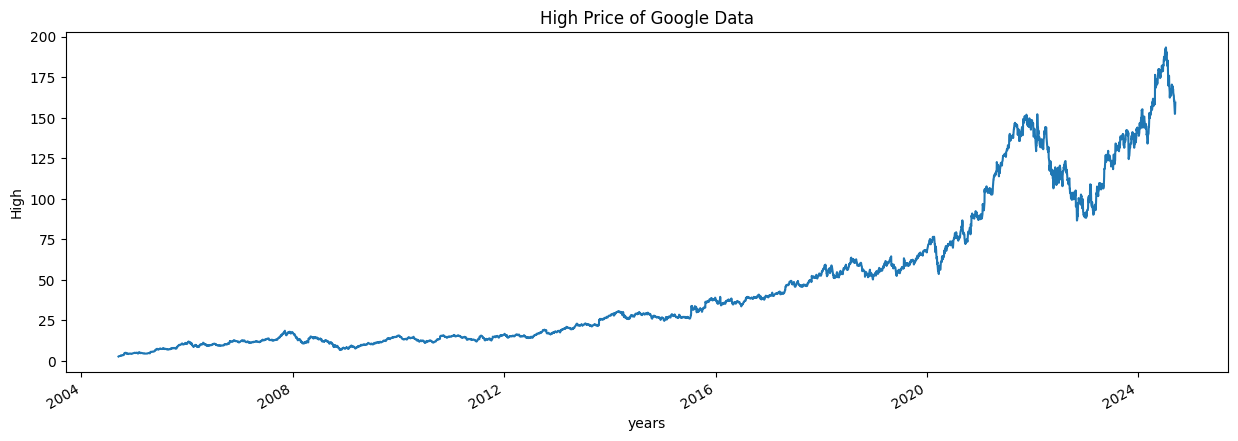

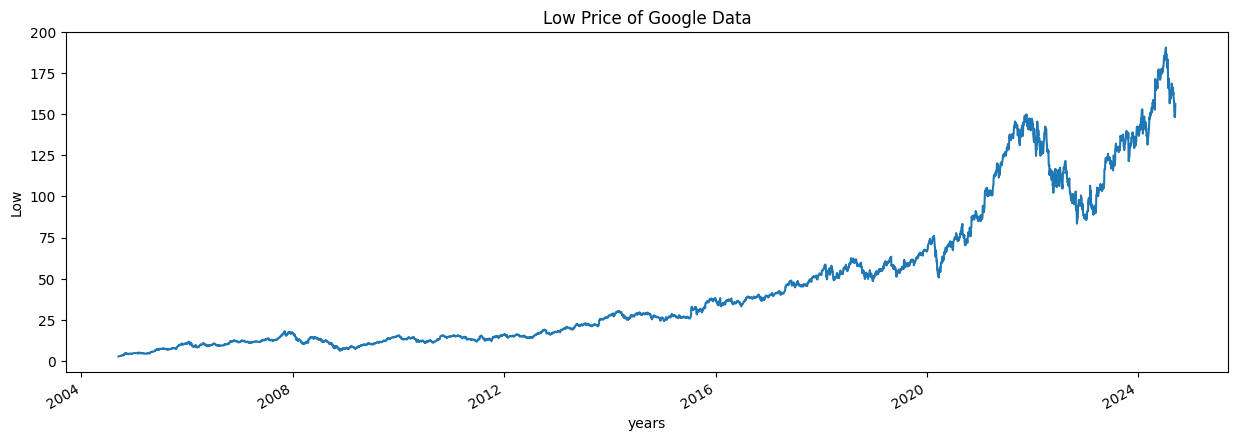

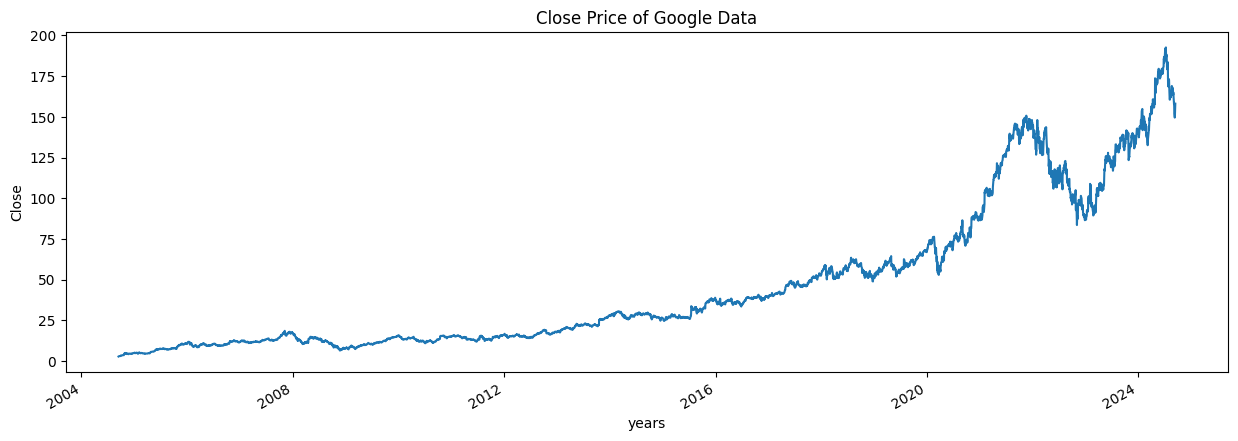

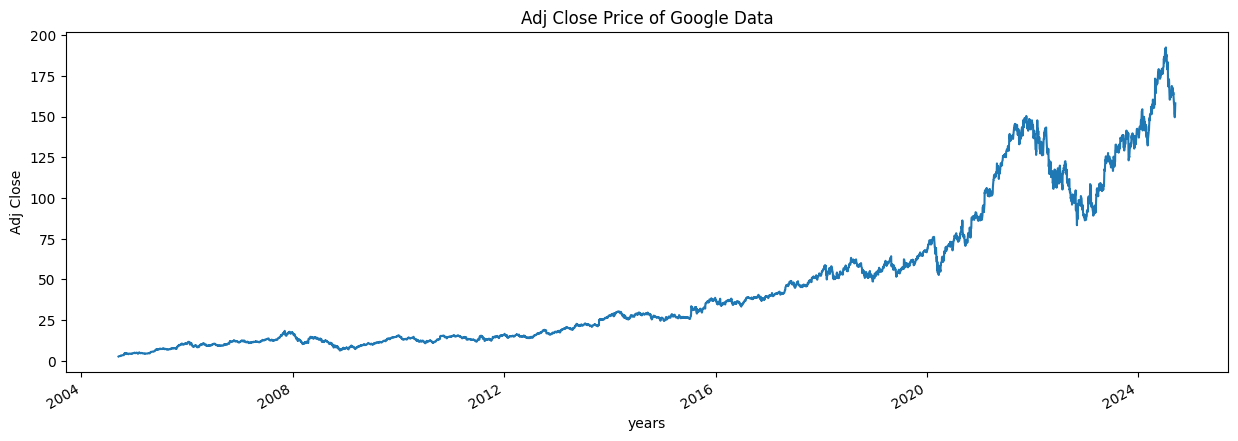

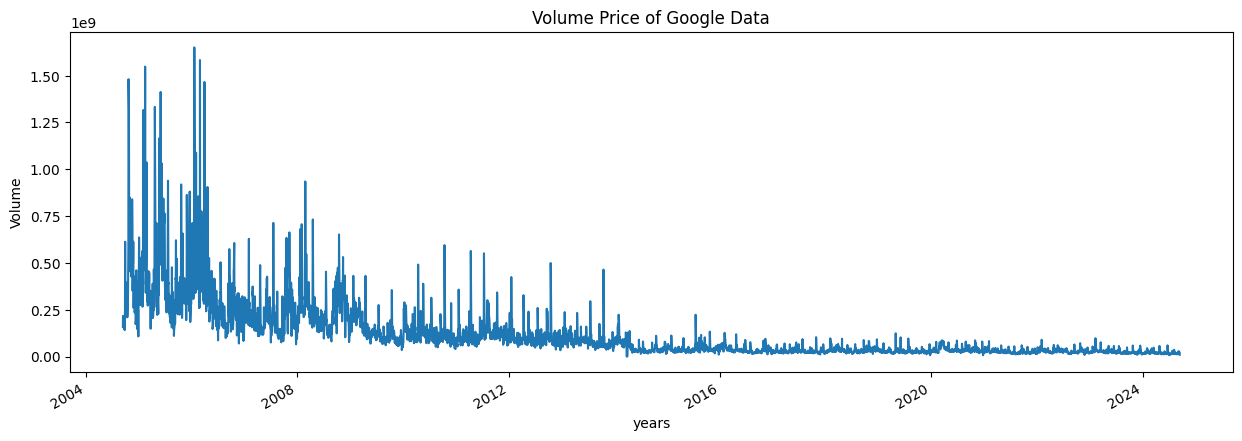

In [24]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

# Moving Average and plotting
temp_data = [10,20,30,40,50,60,70,80,90,100]
sum(temp_data[:5])/5
moving average => null null null null null 30 40 50 60 70 80

In [27]:
import pandas as pd

In [29]:
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100]) # sample data
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [31]:
data['MA'] = data.rolling(5).mean() # moving average of 5 values
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [33]:
# count how  many days are there in each year
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 78
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 177


In [34]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [37]:
google_data['MA_for_250_days'][0:250].tail() # firts 249 rows will get null data 

Date
2005-08-31         NaN
2005-09-01         NaN
2005-09-02         NaN
2005-09-06         NaN
2005-09-07    5.309004
Name: MA_for_250_days, dtype: float64

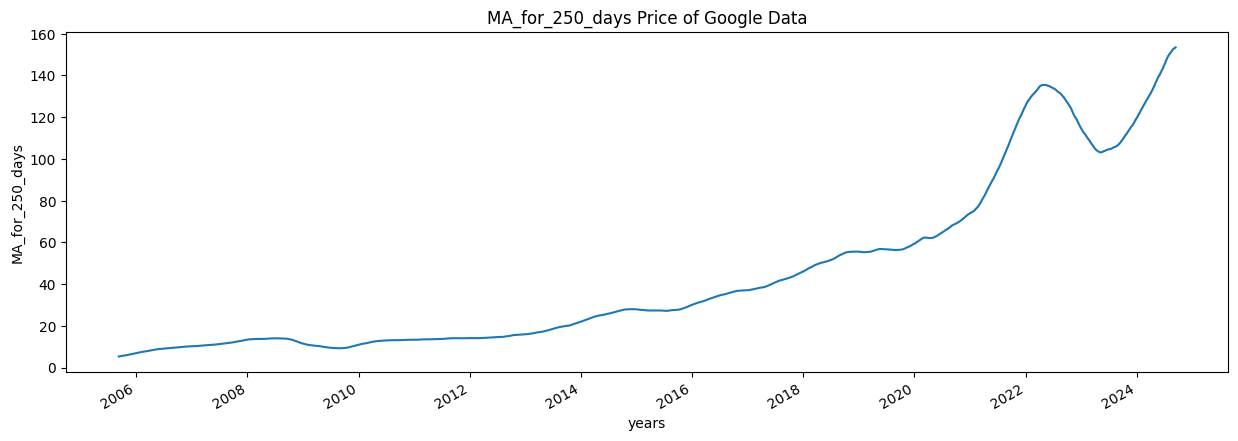

In [39]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

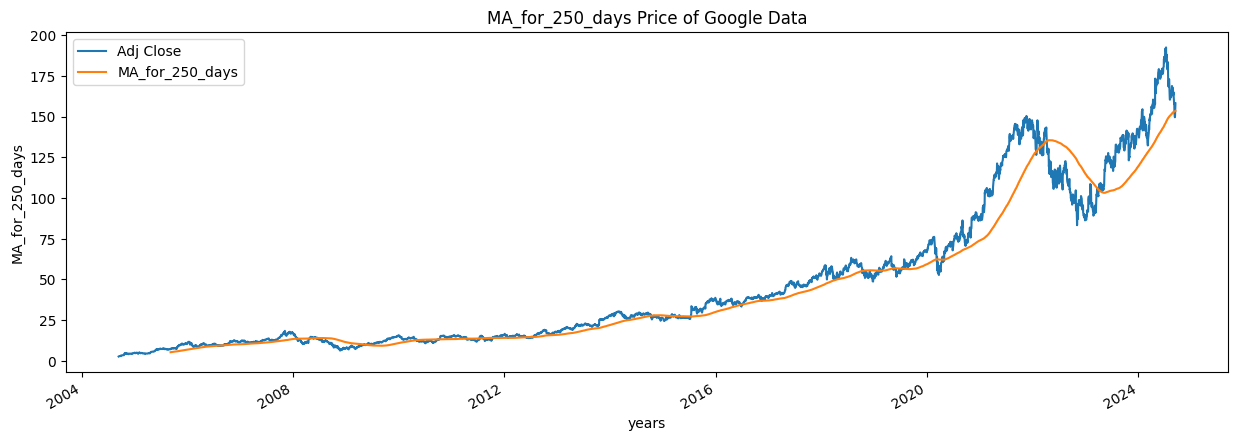

In [40]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

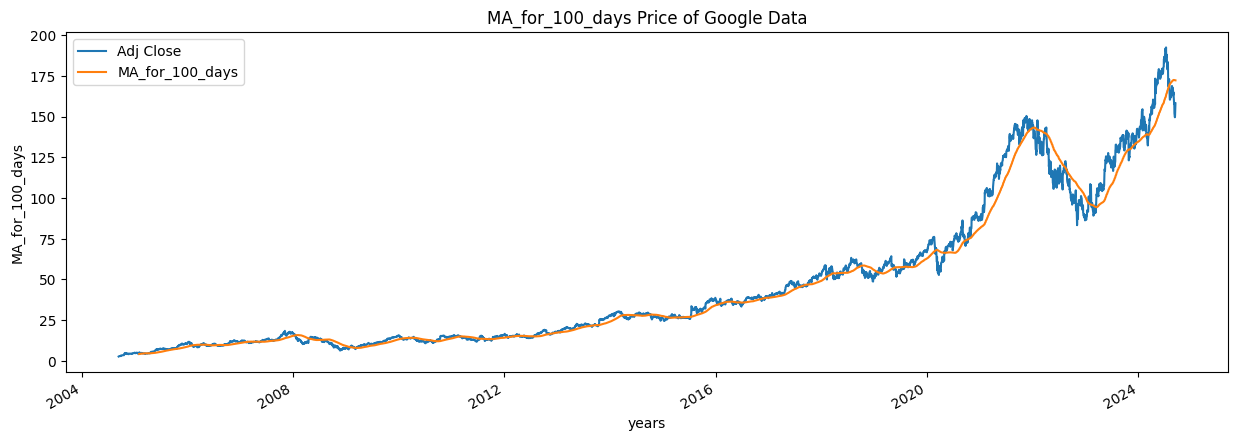

In [41]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

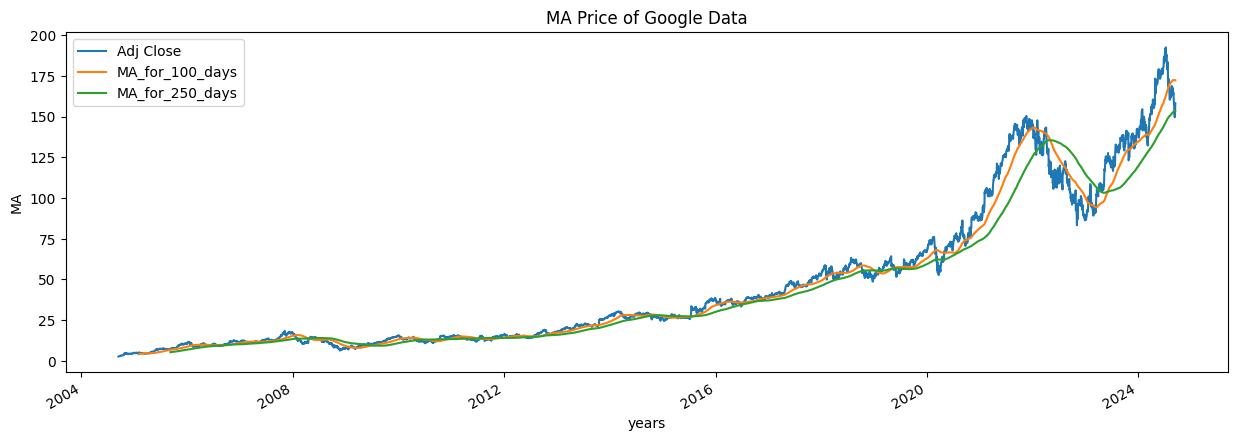

In [43]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [45]:
google_data['percentage_change'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change']].head()

,Adj Close,percentage_change
Date,,
2004-09-13,2.670905,NaN
2004-09-14,2.770039,0.037117
2004-09-15,2.782710,0.004574
2004-09-16,2.831656,0.017589
2004-09-17,2.919113,0.030886


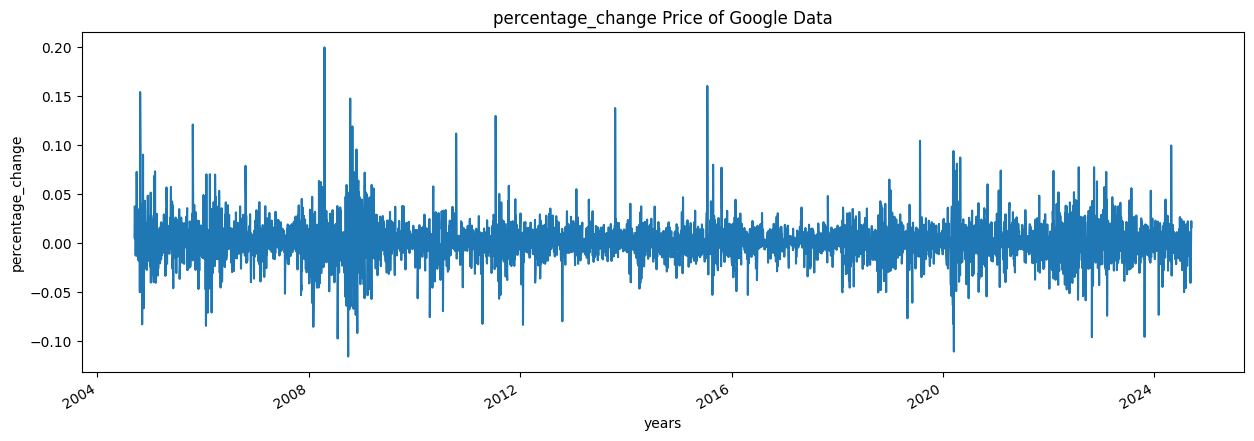

In [50]:
plot_graph((15,5),google_data['percentage_change'],'percentage_change')

# preprocess the data

In [51]:
#Normalizing the input data Adj Close 
#Normalizing mean -> convert the data into sum range  from 0 to 1

In [64]:
Adj_Close_price = google_data[['Adj Close']]
min(Adj_Close_price.values),max(Adj_Close_price.values)

(array([2.67090464]), array([192.40672302]))

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data to be 2D
# Adj_Close_price = Adj_Close_price.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(Adj_Close_price)
scaler_data

array([[0.00000000e+00],
       [5.22487975e-04],
       [5.89270273e-04],
       ...,
       [7.87827467e-01],
       [8.05694412e-01],
       [8.19028816e-01]])

In [67]:
len(scaler_data)

5036

In [69]:
x_data = []
y_data = []
# for 100 days MA first we will get first 99 as NULL (BY LOGIC) so i will start loop from 100

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

In [70]:
import numpy as np
x_data,y_data = np.array(x_data),np.array(y_data)

In [72]:
x_data[0],y_data[0]

(array([[0.        ],
        [0.00052249],
        [0.00058927],
        [0.00084724],
        [0.00130818],
        [0.00155305],
        [0.00135401],
        [0.00142472],
        [0.00174424],
        [0.0016146 ],
        [0.00140901],
        [0.00253517],
        [0.00308777],
        [0.00289396],
        [0.00328419],
        [0.00360894],
        [0.00404238],
        [0.00387346],
        [0.00410524],
        [0.00395858],
        [0.00363513],
        [0.00391536],
        [0.00437368],
        [0.00451772],
        [0.00479403],
        [0.00545532],
        [0.00529556],
        [0.00431999],
        [0.00548412],
        [0.00850249],
        [0.01046279],
        [0.00972948],
        [0.01027553],
        [0.01123539],
        [0.01088706],
        [0.01159287],
        [0.01144098],
        [0.01102194],
        [0.01010923],
        [0.00809916],
        [0.0085182 ],
        [0.00801405],
        [0.00790406],
        [0.00988924],
        [0.00975567],
        [0

# Splitting into training testing 

In [75]:
# 70 % training data
int(len(x_data)*0.7)

3455

In [77]:
# testing data and i have to exclude first 100 days
5036 - 100 - int(len(x_data)*0.7)

1481

In [78]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3455, 100, 1)
(3455, 1)
(1481, 100, 1)
(1481, 1)


# model

In [82]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [85]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25)) # 25 neuron
model.add(Dense(1))

In [105]:
model.compile(optimizer = 'adam' ,loss='mean_squared_error')

In [107]:
model.fit(x_train,y_train,batch_size=1,epochs = 2)

Epoch 1/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 60s 17ms/step - loss: 3.2621e-05
Epoch 2/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 76s 22ms/step - loss: 2.4199e-05


# Predict the test data

In [89]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [90]:
predictions

array([[0.27185652],
       [0.2613762 ],
       [0.26644704],
       ...,
       [0.7609399 ],
       [0.77498686],
       [0.7956394 ]], dtype=float32)

In [91]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54.251827],
       [ 52.263336],
       [ 53.225452],
       ...,
       [147.04846 ],
       [149.71367 ],
       [153.63219 ]], dtype=float32)

In [92]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 52.40679932],
       [ 54.64430237],
       [ 53.44225693],
       ...,
       [152.1499939 ],
       [155.53999329],
       [158.07000732]])

In [95]:
rmse  = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [96]:
rmse

2.899836418492174

In [97]:
plotting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2018-10-24,52.406799,54.251827
2018-10-25,54.644302,52.263336
2018-10-26,53.442257,53.225452
2018-10-29,50.879051,52.924274
2018-10-30,51.683575,50.761921


<Figure size 640x480 with 0 Axes>

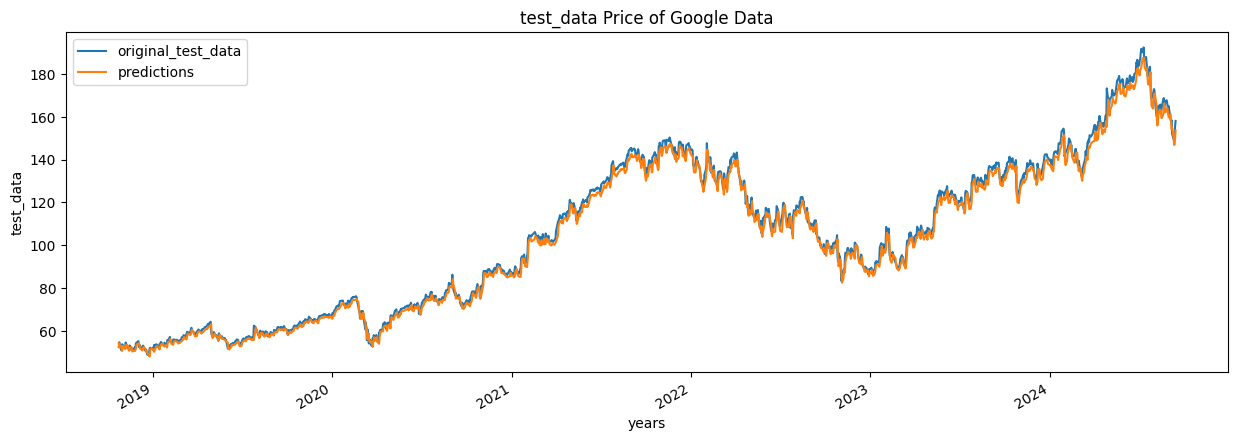

In [98]:
plot_graph((15,5),plotting_data,'test_data')

<Figure size 640x480 with 0 Axes>

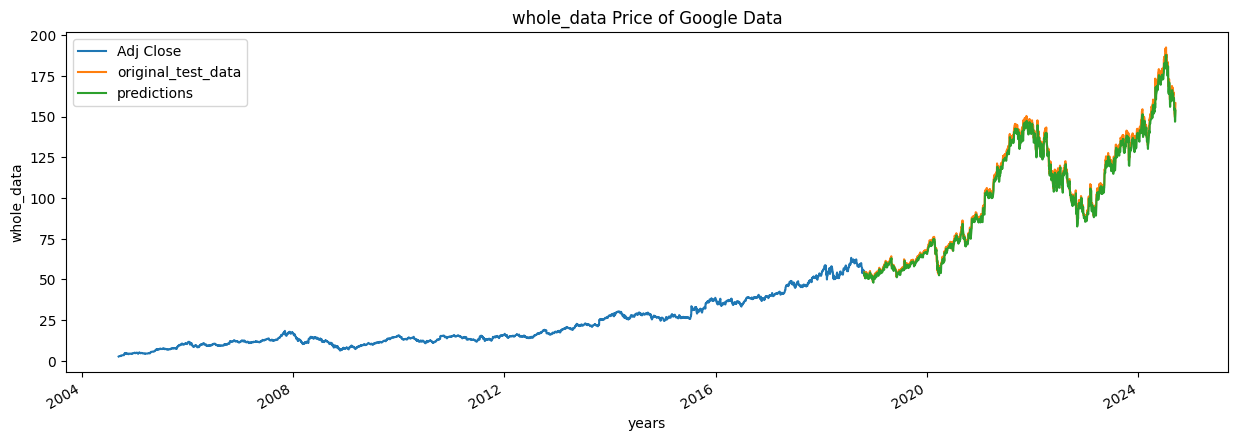

In [100]:
plot_graph((15,5),pd.concat([Adj_Close_price[:splitting_len+100],plotting_data],axis=0),'whole_data')

In [108]:
model.save("Latest_stock_price_model.keras")